In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('bank-full.csv', sep=';')
print("Primele 5 rânduri ale setului de date:")
print(df.head())
print("\nDimensiunea setului de date:", df.shape)

Primele 5 rânduri ale setului de date:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Dimensiunea setului de date: (45211, 17)


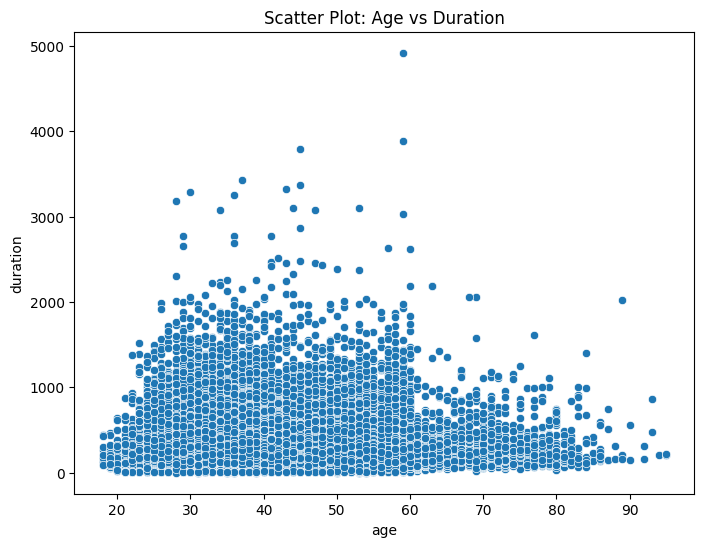


Statistici descriptive:


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
# Preprocesarea datelor
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="age", y="duration")
plt.title("Scatter Plot: Age vs Duration")
plt.show()

print("\nStatistici descriptive:")
df.describe()

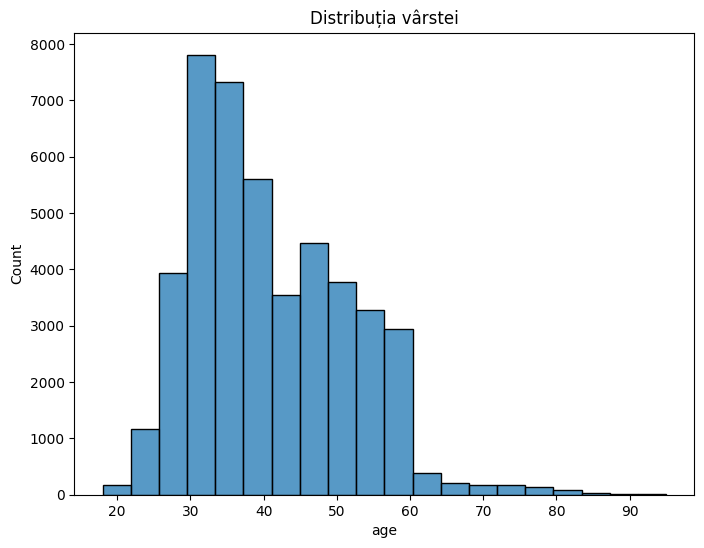

In [5]:
# Histogramă pentru variabila 'age'
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20)
plt.title("Distribuția vârstei")
plt.show()

In [6]:
# Tratarea valorilor lipsă
print("\nVerificarea valorilor lipsă:")
print(df.isnull().sum())


Verificarea valorilor lipsă:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [7]:
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['duration'] >= lower_bound) & (df['duration'] <= upper_bound)]

In [8]:
# Selectăm doar variabilele numerice pentru analiză
numeric_cols = df_no_outliers.select_dtypes(include=[np.number]).columns
df_numeric = df_no_outliers[numeric_cols]

# Standardizarea datelor
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

Reducerea dimensionalității cu PCA


Varianta PCA: [0.21649701 0.16999249]


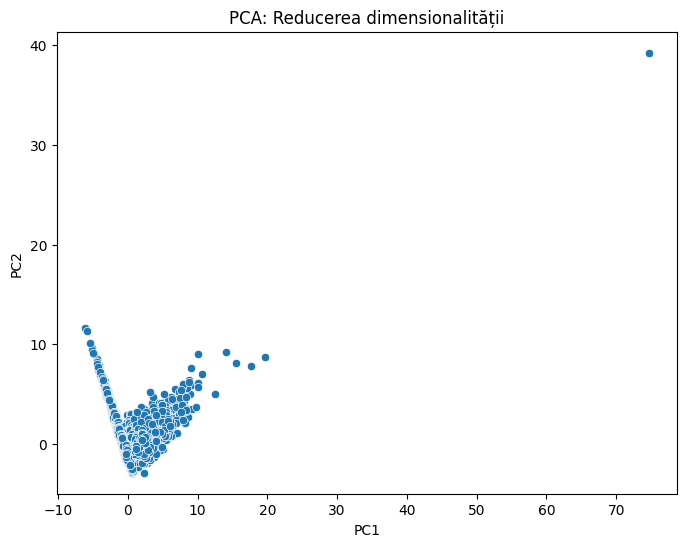

In [9]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
print("\nVarianta PCA:", pca.explained_variance_ratio_)

# Vizualizare PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2")
plt.title("PCA: Reducerea dimensionalității")
plt.show()

Reducerea dimensionalității cu t-SNE

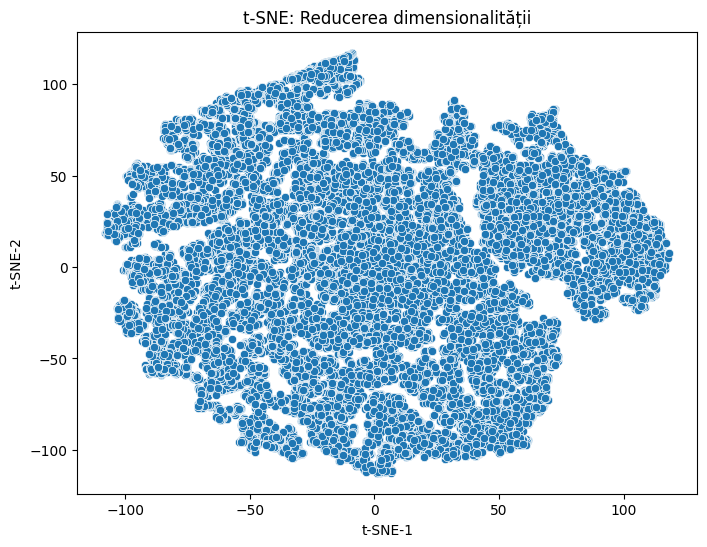

In [10]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df_scaled)
df_tsne = pd.DataFrame(tsne_result, columns=['t-SNE-1', 't-SNE-2'])

# Vizualizare t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_tsne, x="t-SNE-1", y="t-SNE-2")
plt.title("t-SNE: Reducerea dimensionalității")
plt.show()

Clustering cu K-Means

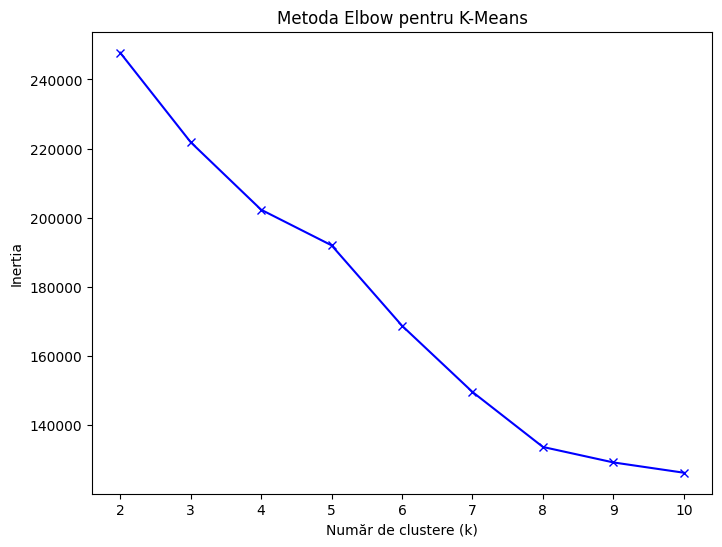

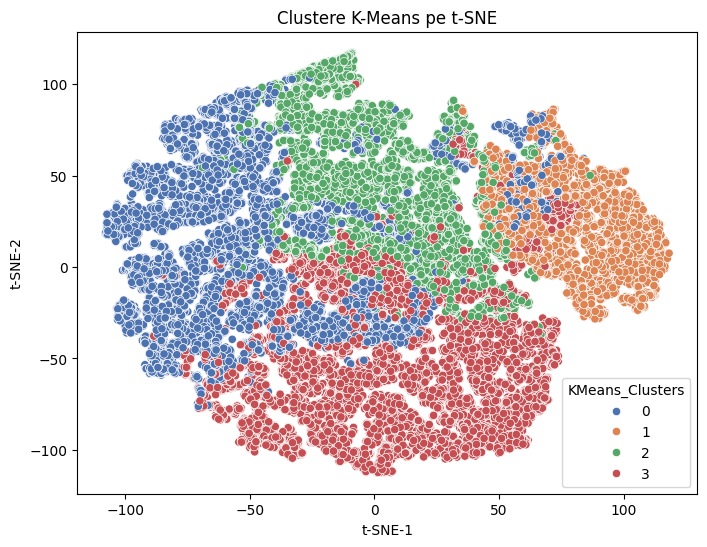

In [11]:
# Metoda Elbow pentru determinarea numărului optim de clustere
inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Număr de clustere (k)')
plt.ylabel('Inertia')
plt.title('Metoda Elbow pentru K-Means')
plt.show()

# Aplicăm K-Means cu numărul optim de clustere (ex. 4, bazat pe Elbow)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)
df_tsne['KMeans_Clusters'] = kmeans_labels

# Vizualizare clustere K-Means pe t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_tsne, x="t-SNE-1", y="t-SNE-2", hue="KMeans_Clusters", palette="deep", legend="full")
plt.title("Clustere K-Means pe t-SNE")
plt.show()

Clustering cu DBSCAN

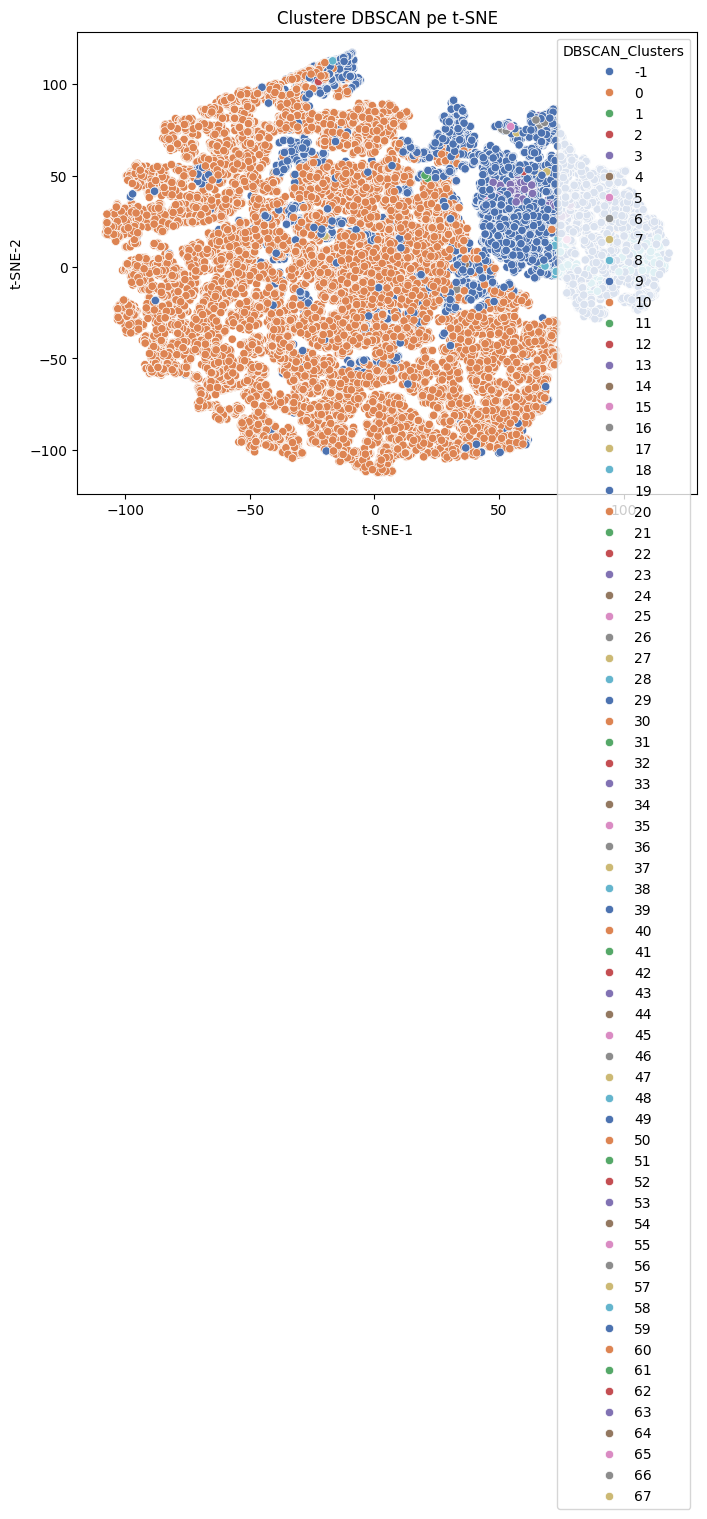

In [12]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)
df_tsne['DBSCAN_Clusters'] = dbscan_labels

# Vizualizare clustere DBSCAN pe t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_tsne, x="t-SNE-1", y="t-SNE-2", hue="DBSCAN_Clusters", palette="deep", legend="full")
plt.title("Clustere DBSCAN pe t-SNE")
plt.show()

Compararea performanțelor modelelor

In [13]:
silhouette_kmeans = silhouette_score(df_scaled, kmeans_labels)
print(f"Scor Silhouette pentru K-Means: {silhouette_kmeans}")

# Scor Silhouette pentru DBSCAN (doar pentru punctele din clustere, excluzând zgomotul)
mask = dbscan_labels != -1  # Excludem zgomotul (-1)
if np.sum(mask) > 1:  # Verificăm dacă există suficiente puncte pentru calcul
    silhouette_dbscan = silhouette_score(df_scaled[mask], dbscan_labels[mask])
    print(f"Scor Silhouette pentru DBSCAN: {silhouette_dbscan}")
else:
    print("Nu există suficiente clustere pentru a calcula scorul Silhouette pentru DBSCAN")

Scor Silhouette pentru K-Means: 0.16307470209159386
Scor Silhouette pentru DBSCAN: -0.3075704103979593
